In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
datos = pd.read_csv('Alquiler_residencial_limpio.csv', sep=';')

In [ ]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0


In [ ]:
datos['Valor'].mean().round(2)

11553.39

In [ ]:
list(datos['Distrito'].drop_duplicates())

['San Borja',
 'Lurigancho',
 'Pachacámac',
 'Ate',
 'Comas',
 'El Agustino',
 'Mi Perú',
 'Chorrillos',
 'San Luis',
 'Callao',
 'San Miguel',
 'Santa Rosa',
 'Rímac',
 'Lince',
 'Jesús María',
 'Miraflores',
 'Breña',
 'Ancón',
 'Santa Anita',
 'Villa María del Triunfo',
 'Punta Hermosa',
 'La Perla',
 'San Juan de Lurigancho',
 'Chaclacayo',
 'Villa El Salvador',
 'Pueblo Libre',
 'Lurín',
 'La Punta',
 'Ventanilla',
 'Santa María del Mar',
 'Barranco',
 'Bellavista',
 'Punta Negra',
 'Santiago de Surco',
 'San Juan de Miraflores',
 'San Isidro',
 'San Bartolo',
 'Carmen de La Legua',
 'Los Olivos',
 'Pucusana',
 'San Martín de Porres',
 'La Molina',
 'Cieneguilla',
 'Independencia',
 'Surquillo',
 'Magdalena del Mar',
 'Lima',
 'La Victoria',
 'Puente Piedra',
 'Carabayllo']

In [ ]:
barrios = ['Ate', 'Barranco', 'Comas', 'Lince', 'El Agustino', 'San Luis', 'Callao']
seleccion = datos['Distrito'].isin(barrios)
datos = datos[seleccion]

In [ ]:
datos['Distrito'].drop_duplicates()

3              Ate
4            Comas
6      El Agustino
14        San Luis
15          Callao
25           Lince
178       Barranco
Name: Distrito, dtype: object

In [ ]:
grupo_barrios = datos.groupby('Distrito')

In [ ]:
grupo_barrios.groups

{'Ate': [3, 5, 16, 18, 24, 33, 35, 38, 45, 46, 63, 64, 65, 67, 71, 77, 82, 84, 96, 110, 113, 115, 120, 133, 135, 139, 156, 159, 161, 171, 172, 179, 192, 195, 215, 222, 229, 232, 242, 243, 246, 249, 254, 270, 276, 286, 288, 303, 304, 305, 307, 314, 320, 323, 337, 347, 348, 349, 358, 373, 379, 381, 387, 393, 401, 403, 414, 426, 446, 447, 449, 450, 453, 463, 466, 477, 478, 480, 488, 491, 499, 509, 515, 519, 527, 533, 543, 554, 555, 556, 557, 560, 564, 569, 571, 572, 573, 589, 603, 607, ...], 'Barranco': [178, 1058, 1199, 1730, 2060, 2149, 2721, 3091, 3396, 3828, 4935, 4977, 5692, 6696, 8044, 9427, 9904, 9947, 10255, 10516, 11249, 11490, 11830, 11949, 12188, 12630, 12699, 12714, 13287, 13926, 14016, 14878, 15663, 16697, 17006, 18514, 19477, 19530, 19573, 20315, 21746, 21778, 21798, 21799, 22202, 22249, 22422], 'Callao': [15, 61, 86, 109, 126, 138, 162, 169, 194, 211, 230, 283, 317, 318, 359, 396, 470, 506, 550, 625, 710, 722, 806, 839, 888, 911, 999, 1138, 1143, 1403, 1496, 1553, 1580, 158

In [ ]:
for barrios, data in grupo_barrios:
  print('{}->{}'.format(barrios, data.Valor.mean().round(2)))

Ate->8191.53
Barranco->1403.83
Callao->5468.42
Comas->8823.51
El Agustino->2664.88
Lince->170055.07
San Luis->2100.21


In [ ]:
grupo_barrios[['Valor','Mantenimiento','Impuesto']].mean().round(2)

,Valor,Mantenimiento,Impuesto
Distrito,,,
Ate,8191.53,3571.70,1576.73
Barranco,1403.83,324.89,48.53
Callao,5468.42,671.54,295.04
Comas,8823.51,2124.34,711.60
El Agustino,2664.88,173.93,1362.19
Lince,170055.07,388.25,110.95
San Luis,2100.21,463.83,220.30


In [ ]:
grupo_barrios['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,4088.0,8191.53,28350.56,200.0,2500.0,4200.0,8500.0,738197.0
Barranco,47.0,1403.83,1496.62,450.0,800.0,1100.0,1200.0,8000.0
Callao,482.0,5468.42,44659.51,500.0,1200.0,1700.0,2200.0,800000.0
Comas,2089.0,8823.51,9690.99,400.0,3800.0,6500.0,10000.0,180000.0
El Agustino,122.0,2664.88,7154.29,500.0,800.0,1000.0,1240.0,39000.0
Lince,713.0,170055.07,4493970.32,300.0,850.0,1200.0,1800.0,120000000.0
San Luis,389.0,2100.21,3198.51,500.0,1000.0,1400.0,2000.0,37500.0


In [ ]:
grupo_barrios['Valor'].agg(['min', 'max']).rename(columns = {'min': 'Mini', 'max': 'Maximo'})

,Mini,Maximo
Distrito,,
Ate,200.0,738197.0
Barranco,450.0,8000.0
Callao,500.0,800000.0
Comas,400.0,180000.0
El Agustino,500.0,39000.0
Lince,300.0,120000000.0
San Luis,500.0,37500.0


In [ ]:
plt.rc('figure', figsize= (10,5))

Text(0.5, 1.0, 'Valor Promedio de alquiler por distrito')

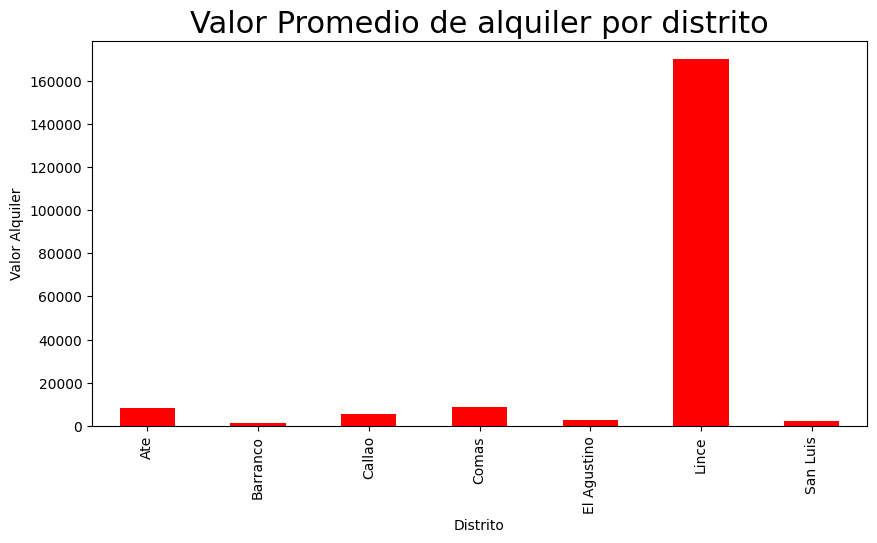

In [ ]:
fig = grupo_barrios['Valor'].mean().plot.bar(color = 'red')
fig.set_ylabel('Valor Alquiler')
fig.set_title("Valor Promedio de alquiler por distrito", {'fontsize': 22})

Text(0.5, 1.0, 'Valor máximo del alquiler por distrito')

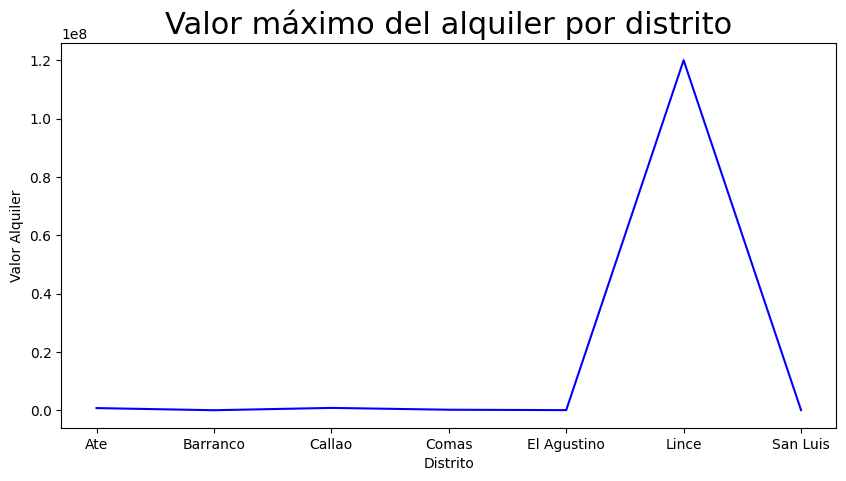

In [ ]:
fig = grupo_barrios['Valor'].max().plot.line(color = 'blue')
fig.set_ylabel('Valor Alquiler')
fig.set_title("Valor máximo del alquiler por distrito", {'fontsize': 22})

Text(0.5, 1.0, 'Cantidad de mantenimientos por Distrito')

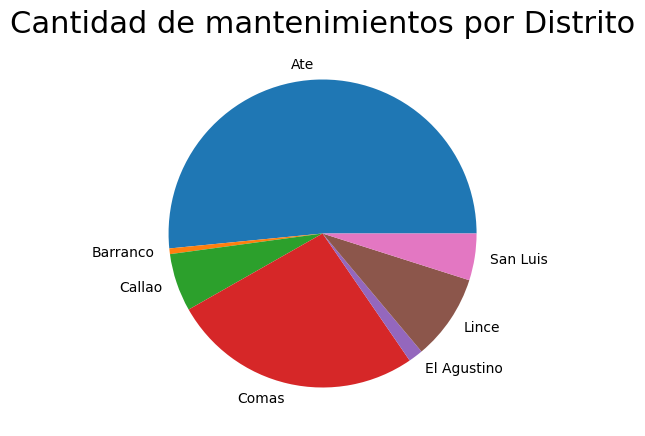

In [ ]:
fig = grupo_barrios['Mantenimiento'].count().plot.pie()
fig.set_ylabel('')
fig.set_title("Cantidad de mantenimientos por Distrito", {'fontsize': 22})